# Sistema de Recomendación de Cultivos
## Entrega 1: EDA completo

**Machine Learning**

**Profesor:** Marco Terán  
**Fecha:** 2025/09/30

**Integrantes**

- Daniel Alejandro Garcia Zuluaica
- Edward Alejandro Rayo Cortés
- Elizabeth Toro Chalarca

___

## 📋 Tabla de Contenidos

1. **Configuración del entorno**
2. **Comprensión del Negocio**
3. **Obtención y Comprensión de Datos**
4. **Análisis Exploratorio (EDA)**

---

In [2]:
print("¡Bienvenidos al primer notebook!")

¡Bienvenidos al primer notebook!


---

## 1. Configuración del Entorno

### ¿Por qué importan las versiones?

En ML, la reproducibilidad es crucial. Imagina que tu modelo funciona perfectamente en tu computadora pero falla en producción. La causa más común: diferentes versiones de librerías.

**Regla de oro**: Siempre documenta y verifica las versiones de tus dependencias.

### Librerías que usaremos

- **NumPy**: El motor matemático de Python. Maneja arrays y operaciones numéricas eficientemente
- **Pandas**: Como Excel con superpoderes. Organiza datos en DataFrames (tablas)
- **Matplotlib/Seaborn**: Nuestros artistas. Crean visualizaciones profesionales
- **Scikit-learn**: La navaja suiza del ML. Contiene algoritmos, métricas y utilidades

### Configuración visual

Los defaults de matplotlib no son los más bonitos. Vamos a configurar:
- Estilo consistente para todos los gráficos
- Tamaños legibles
- Colores agradables
- Formato de números apropiado

In [3]:
# Configuración inicial del entorno
import sys
import warnings
warnings.filterwarnings('ignore')

# Verificar versión de Python
assert sys.version_info >= (3, 7), "Este notebook requiere Python 3.7 o superior"

print(f"✅ Python {sys.version_info.major}.{sys.version_info.minor} instalado correctamente")

✅ Python 3.12 instalado correctamente


## Importando Librerias

Descargarems las librerias necesarias para utilizar el modelo, esto solo se ejecuta una vez

In [4]:
pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Validación de librerias

Se verifica que las librerias que vamos a usar estén completamente descargadas


- **NumPy**
- **Pandas**
- **Matplotlib/Seaborn**
- **Scikit-learn**

In [5]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from scipy import stats

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("husl")

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


#### Verificar versiones de librerías críticas
Se valida que tengamos la versión mínima de las librerias

In [6]:

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1"), "Requiere scikit-learn >= 1.0.1"
print(f"✅ scikit-learn {sklearn.__version__} instalado")

✅ scikit-learn 1.7.2 instalado


## 💼 2. Fase 1: Comprensión del Negocio <a name="business_understanding"></a>

### El problema de seleccionar un cultivo invalido

**Contexto**: Imagina que eres un agricultor y quieres determinar cuál sería el mejor cultivo para sembrar sin verte afectado por factores de perdidas económicas, mal uso de los recursos y/o degradaciones ambientales.

La agricultura es fundamental para la seguridad alimentaria y el desarrollo económico. Los agricultores a menudo enfrentan desafíos al seleccionar el cultivo adecuado 
para su tierra según las condiciones del suelo y el ambiente. Una mala selección de cultivos puede llevar a:
 
**Problema actual**:
- Rendimientos reducidos: Los cultivos inadecuados pueden producir 30–50% menos que cultivos óptimos para las mismas condiciones [1].
- Pérdidas económicas: Estimadas en $1,000–$5,000 USD por hectárea por temporada en cultivos no optimizados [2].
- Uso ineficiente de recursos: Hasta 40% de desperdicio en agua y fertilizantes cuando el cultivo no coincide con las condiciones del suelo [3].
- Degradación ambiental: Agotamiento de nutrientes del suelo y erosión por prácticas agrícolas inadecuadas [4].

**Solución propuesta**: Determinar el conjunto de características y el algoritmo de Machine Learning que ofrezca el mejor desempeño en la predicción del cultivo más adecuado, considerando variables que representan los nutrientes del suelo (N, P, K) y condiciones agroclimáticas (pH, temperatura, humedad y precipitación).

### Definiendo el éxito

**Métrica de negocio**: 
- **Incremento en rendimiento**: Aumento del 15-20% en productividad de cultivos
	- Justificación: Estudios recientes han demostrado que los sistemas de recomendación de cultivos basados en Machine Learning pueden mejorar el rendimiento entre un 15% y 30% respecto a métodos tradicionales [2][3][5].
	- Relevancia: Este aumento representa una mejora tangible en la productividad agrícola, lo que incentiva la adopción del sistema por parte de los agricultores.

- **Reducción de costos**: Disminución del 25% en pérdidas por selección incorrecta
	- Justificación: La selección incorrecta de cultivos puede generar pérdidas de hasta $5,000 USD por hectárea [2]. Al recomendar cultivos más adecuados, se reduce el uso innecesario de fertilizantes, agua y otros insumos, lo que se traduce en una disminución directa de los costos operativos.
	- Relevancia: Esta métrica es crítica para demostrar el valor económico del sistema, especialmente en regiones con recursos limitados.

- **ROI**: Retorno de inversión positivo en 2 temporadas de cultivo
	- Justificación: Si el sistema logra aumentar el rendimiento y reducir los costos en una sola temporada, el agricultor puede recuperar la inversión en tecnología, capacitación o infraestructura en menos de dos ciclos agrícolas.
	- Relevancia: Un ROI rápido es clave para la sostenibilidad del proyecto y para convencer a financiadores o instituciones agrícolas.

- **Adopción**: Al menos 80% de recomendaciones implementadas por agricultores piloto
	- Justificación: La tasa de adopción refleja la aceptación del sistema en condiciones reales. Estudios previos muestran que los agricultores tienden a adoptar tecnologías que demuestran beneficios claros en campo [5][6].
	- Relevancia: Esta métrica valida la usabilidad y confianza en el sistema, y es esencial para escalar el proyecto a nivel regional o nacional.

**Métrica técnica**:
- **Accuracy >= 95%**: 
	- Justificación: En un problema de clasificación multiclase con 22 clases, un modelo aleatorio tendría una precisión de apenas ~4.5%. Alcanzar una accuracy ≥95% indica que el modelo ha aprendido patrones significativos y útiles para la predicción [2][3].
	- Evidencia: Modelos recientes como redes neuronales profundas y transformers (GPT-2) han alcanzado precisiones superiores al 97% en tareas similares de recomendación de cultivos [2][3].
	- Relevancia: Una alta accuracy genera confianza en los agricultores y valida el uso del sistema en campo [5].

- **Precision y Recall ≥ 90% por clase**
	- Justificación:
		- Precision alta: Evita falsos positivos, es decir, recomendar cultivos inadecuados que pueden generar pérdidas económicas significativas (~$3,000 USD/ha) [2].
		- Recall alto: Evita falsos negativos, asegurando que no se omitan cultivos viables que podrían mejorar el rendimiento.
	- Evidencia: Estudios como el de Reddy et al. (2024) y Bhola & Kumar (2024) muestran que los modelos bien calibrados pueden mantener estos valores por clase en problemas agrícolas complejos [2][6].
	- Relevancia: Estas métricas son críticas para decisiones agrícolas, donde cada recomendación tiene un impacto económico directo.

- **F1-Score ≥ 90%**
	El F1-Score combina precisión y exhaustividad, lo que permite evaluar el rendimiento del modelo de forma equilibrada, especialmente en clases con menor representación.
	En sistemas de recomendación agrícola, el F1-Score ≥90% ha sido usado como estándar para validar modelos antes de su implementación en campo [4][6].

**Nota sobre el tipo de problema**:
Este es un problema de **clasificación multiclase**, NO de regresión. Por tanto, MAE (Error Absoluto Medio) no es la métrica apropiada. MAE se usa para predecir valores continuos (ej: precio, cantidad), pero aquí predecimos categorías (tipos de cultivo).

### Preguntas críticas antes de empezar

**¿Realmente necesitamos ML?** Sí, por las siguientes razones:
- Complejidad del problema: Con 7 variables continuas y 22 clases, existen más de 10⁶ combinaciones posibles. Es impracticable crear reglas manuales [2].
- Interacciones no lineales: Las relaciones entre N-P-K, clima y pH son complejas y no evidentes. ML puede capturar estos patrones de forma más precisa que los métodos tradicionales [5].
- Escalabilidad: Un sistema ML puede analizar miles de casos en segundos, mientras que un agrónomo tardaría horas en evaluar cada uno manualmente.
- Evidencia científica: Estudios recientes muestran que los sistemas ML para recomendación de cultivos superan en 15–30% a métodos basados en reglas o expertos humanos [2][3][5][6].

Alternativas consideradas y descartadas:

Tablas de decisión manual: No escalables, no capturan interacciones complejas.
Consulta a expertos agrícolas: Costoso ($100–200 USD/consulta), subjetivo, no disponible 24/7.
Sistemas basados en reglas simples: Accuracy <70% en evaluaciones previas [5].

**¿Qué pasa si el modelo falla?** Análisis de riesgos y mitigación:

**Escenario 1**: Falso Positivo (recomienda cultivo inadecuado)
	- Impacto: Pérdida de inversión de temporada (~$3,000 USD/ha).
	Probabilidad con modelo ≥95% accuracy: ~2–3% de casos.
	- Mitigación:Mostrar solo recomendaciones con >85% de probabilidad.
	Validación humana por agrónomo en casos de baja confianza.
	Implementación piloto en ≤20% del área antes de escalar.

**Escenario 2**: Falso Negativo (no recomienda cultivo adecuado)
	- Impacto: Costo de oportunidad (rendimiento subóptimo). Probabilidad: ~5% de casos.
	- Mitigación: Mostrar top-3 recomendaciones con probabilidades. Permitir retroalimentación del agricultor para mejorar el sistema.

**Escenario 3**: Falla total del sistema
	- Impacto: Reversión a métodos tradicionales.
	Probabilidad: Muy baja con validación robusta.
	- Mitigación: Backup de sistema tradicional disponible.
	Validación en conjunto de test independiente.
	Monitoreo continuo de métricas en producción.

### Plan de contingencia
- Si accuracy cae <90% en producción → Alerta automática.
- Si accuracy cae <85% → Sistema se desactiva automáticamente.
- Revisión trimestral con datos reales de campo.

---

## 3. Fase 2: Obtención y Comprensión de Datos <a name="data_understanding"></a>

### El dataset para Recomendación de Cultivos

**Origen**: Conjunto de Datos para Recomendación de Cultivos  
**Tamaño**: 2,200 muestras  
**Granularidad**: Cada fila representa una muestra con el cultivo recomendado en función de la composición del suelo y las condiciones climáticas.

### ¿Por qué este dataset?

- **Clásico en ML**: Bien estudiado, podemos comparar resultados
- **Tamaño apropiado**: Ni muy pequeño ni muy grande para aprender
- **Múltiples tipos de datos**: Numéricos y categóricos

### Estrategia de descarga robusta

Implementaremos:
1. **Caché local**: Si ya descargamos, no repetir
2. **Manejo de errores**: Si falla la descarga, informar claramente
3. **Estructura organizada**: Carpeta datasets/ para todos los datos

In [7]:
#importar funciones utilitarias implementads en el directorio src
import sys
sys.path.append('../src')

### Descarga y Carga de Datos

In [8]:
# Función para descargar datos
import importlib
import data_loader
importlib.reload(data_loader)

from data_loader import load_crop_data

crop_data = load_crop_data()
print(crop_data.head())

📁 Cargando datos desde caché local: Crop_recommendation.csv
    N   P   K  temperature  humidity   ph  rainfall label
0  90  42  43        20.88     82.00 6.50    202.94  rice
1  85  58  41        21.77     80.32 7.04    226.66  rice
2  60  55  44        23.00     82.32 7.84    263.96  rice
3  74  35  40        26.49     80.16 6.98    242.86  rice
4  78  42  42        20.13     81.60 7.63    262.72  rice


### 🔍 Análisis Exploratorio de Datos (EDA)

#### ¿Qué es EDA y por qué es crucial?

**EDA es como ser un detective**: Buscas pistas, anomalías y patrones en los datos.

**John Tukey** (inventor del EDA) dijo: "Es mejor una respuesta aproximada a la pregunta correcta que una respuesta exacta a la pregunta incorrecta."

#### Primera impresión: Vista rápida

**¿Qué buscamos?**
- Tipos de datos (numéricos, texto, fechas)
- Dimensiones (filas × columnas)
- Valores faltantes obvios
- Rangos sospechosos

**Herramientas**: head(), info(), describe()

### Primera Inspección de Datos

In [9]:
# Vista general del dataset
print("=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET".center(80))
print("=" * 80)

# Mostrar primeras filas con formato mejorado
display(crop_data.head().style.background_gradient(cmap='coolwarm', subset=['temperature', 'humidity', 'ph', 'rainfall']))

# Información detallada
print("\n" + "=" * 80)
print("ESTRUCTURA DE DATOS".center(80))
print("=" * 80)
crop_data.info()

# Estadísticas descriptivas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS".center(80))
print("=" * 80)
display(crop_data.describe().round(2).T)

                        INFORMACIÓN GENERAL DEL DATASET                         


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice



                              ESTRUCTURA DE DATOS                               
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB

                           ESTADÍSTICAS DESCRIPTIVAS                            


,count,mean,std,min,25%,50%,75%,max
N,2200.00,50.55,36.92,0.00,21.00,37.00,84.25,140.00
P,2200.00,53.36,32.99,5.00,28.00,51.00,68.00,145.00
K,2200.00,48.15,50.65,5.00,20.00,32.00,49.00,205.00
temperature,2200.00,25.62,5.06,8.83,22.77,25.60,28.56,43.68
humidity,2200.00,71.48,22.26,14.26,60.26,80.47,89.95,99.98
ph,2200.00,6.47,0.77,3.50,5.97,6.43,6.92,9.94
rainfall,2200.00,103.46,54.96,20.21,64.55,94.87,124.27,298.56


### Descripción de Variables

### Entendiendo cada variable


In [10]:
# Diccionario de metadatos
metadata = {
    'Variable': ['N','P','k','temperature','humidity','ph','rainfall','label'],
    'Tipo': ['Numérica', 'Numérica', 'Numérica', 'Numérica', 'Numérica', 
             'Numérica', 'Numérica', 'Categórica (target)'],
    'Descripción': [
        'Cantidad de nitrogeno en el suelo (en mg/kg)',
        'Cantidad de fosforo en el suelo (en mg/kg)',
        'Cantidad de potacio en el suelo (en mg/kg)',
        'Temperatura promedio (en °C)',
        'Porcentaje de humedad relativa (%)',
        'Valor del pH del suelo (0-14 escala cerca al cero más ácido)',
        'Precipitación (en mm)',
        'Tipo de cultivo recomendado para las condiciones dadas (ej: arroz, maíz, etc.)',
    ],
    'Valores Faltantes': [
        crop_data['N'].isnull().sum(),
        crop_data['P'].isnull().sum(),
        crop_data['K'].isnull().sum(),
        crop_data['temperature'].isnull().sum(),
        crop_data['humidity'].isnull().sum(),
        crop_data['ph'].isnull().sum(),
        crop_data['rainfall'].isnull().sum(),
        crop_data['label'].isnull().sum(),
    ]
}

df_metadata = pd.DataFrame(metadata)
display(df_metadata.style.map(
    lambda x: 'background-color: #ffcccc' if x > 0 else '', 
    subset=['Valores Faltantes']
))

,Variable,Tipo,Descripción,Valores Faltantes
0,N,Numérica,Cantidad de nitrogeno en el suelo (en mg/kg),0
1,P,Numérica,Cantidad de fosforo en el suelo (en mg/kg),0
2,k,Numérica,Cantidad de potacio en el suelo (en mg/kg),0
3,temperature,Numérica,Temperatura promedio (en °C),0
4,humidity,Numérica,Porcentaje de humedad relativa (%),0
5,ph,Numérica,Valor del pH del suelo (0-14 escala cerca al cero más ácido),0
6,rainfall,Numérica,Precipitación (en mm),0
7,label,Categórica (target),"Tipo de cultivo recomendado para las condiciones dadas (ej: arroz, maíz, etc.)",0


---
### Detectando problemas en los datos

#### Análisis de Valores Faltantes (Missing values)


In [11]:
# Análisis detallado de valores faltantes

from analyze_missing_values import analyze_missing_values

missing_analysis = analyze_missing_values(crop_data)
if missing_analysis is not None:
    print(missing_analysis)


✅ No hay valores faltantes en el dataset


### ✅ Análisis de Valores Faltantes

**Resumen:**  
- No se detectaron valores faltantes en ninguna columna.  
- Completitud global: **100%** de las celdas contienen datos válidos.

**Metodología aplicada**
1. Conteo absoluto por columna: `df.isnull().sum()`  
2. Porcentaje relativo: `(df.isnull().mean() * 100).round(2)`  
3. (Condicional) Visualizaciones: barra de % de faltantes y mapa de patrones (no generadas porque no hubo nulos).  
4. Criterios de alerta habituales:  
   - > 5%: monitoreo / imputación ligera  
   - > 5–20%: evaluar impacto y estrategia de imputación  
   - > 20%: considerar eliminación o técnicas avanzadas (MICE / modelos)  

**Resultados obtenidos**
| Métrica | Valor |
|---------|-------|
| Columnas con faltantes (>0) | 0 |
| Total de celdas nulas | 0 |
| Porcentaje global de faltantes | 0.00% |
| Columnas afectadas | Ninguna |
| Patrón estructurado de nulos | No aplica |

**Implicaciones prácticas**
- No se requiere imputación (media / mediana / moda / KNN / regresión).  
- No es necesario eliminar filas o columnas por incompletitud.  
- Menor riesgo de introducir sesgo por decisiones de relleno artificial.  
- Pipeline de preprocesamiento más simple (menos pasos y menos hiperparámetros).  
- Se acelera la experimentación en etapas posteriores (feature engineering y modelado).  

**Próximos pasos recomendados**
- Validar consistencia semántica (rango y plausibilidad de valores).  
- Monitorear valores atípicos y distribución (ya que no hay nulos, la calidad dependerá de outliers y escalas).  
- Asegurar que en futuras integraciones de datos (nuevas fuentes) se mantenga esta calidad mediante validaciones automáticas.

> Estado: Excelente calidad estructural respecto a completitud; la atención se puede enfocar ahora en variabilidad, outliers y relaciones entre variables.


### Análisis Univariado

#### 1. Variables Numéricas (7 características)

En este apartados analizaremos a cada una de las características (N, P, K, temperature, humidity, ph, rainfall)

- Estadísticas descriptivas completas
- Implicación de dispersión a través del coeficiente de variación
- Implicación de forma a través de la distribución de la gráfica (Asimetría y Curtosis)
- Confiabilidad de los datos (Validar valores Atípicos)

Finalmente tendremos un resumen ejecutivo que contenga toda esta información


                           ESTADÍSTICAS DESCRIPTIVAS                            


,count,mean,std,min,25%,50%,75%,max
N,2200.00,50.55,36.92,0.00,21.00,37.00,84.25,140.00
P,2200.00,53.36,32.99,5.00,28.00,51.00,68.00,145.00
K,2200.00,48.15,50.65,5.00,20.00,32.00,49.00,205.00
temperature,2200.00,25.62,5.06,8.83,22.77,25.60,28.56,43.68
humidity,2200.00,71.48,22.26,14.26,60.26,80.47,89.95,99.98
ph,2200.00,6.47,0.77,3.50,5.97,6.43,6.92,9.94
rainfall,2200.00,103.46,54.96,20.21,64.55,94.87,124.27,298.56



ANÁLISIS UNIVARIADO: N
1. Forma de la Distribución:


,Métrica,Valor,Interpretación
0,Asimetría (Skewness),0.510,Asimétrica positiva (cola derecha)
1,Curtosis,-1.058,Aplastada (platicúrtica)



2. Calidad de Datos:


,Aspecto,Resultado,Interpretación
0,Outliers,0 (0.00%),Sin outliers
1,Test de Normalidad,p-value = 0.0000,NO normal



3. Resumen Ejecutivo:


,Aspecto,Hallazgo,Implicación
0,Rango,0.00 - 140.00,Muy alta (CV=73.0%)
1,Centralidad,"μ=50.55, M=37.00",Valores altos presentes
2,Dispersión,σ=36.92,Muy alta (CV=73.0%)
3,Forma,Skew=0.51,Mayoría valores bajos
4,Calidad,0 outliers,Datos confiables
5,Normalidad,NO normal,Escalado necesario



5. Interpretación por Cuartiles:


,Nivel,Descripción
0,Bajo (0-25%),0-21 kg/ha
1,Medio-Bajo (25-50%),21-37 kg/ha
2,Medio-Alto (50-75%),37-84 kg/ha
3,Alto (75-100%),> 84 kg/ha


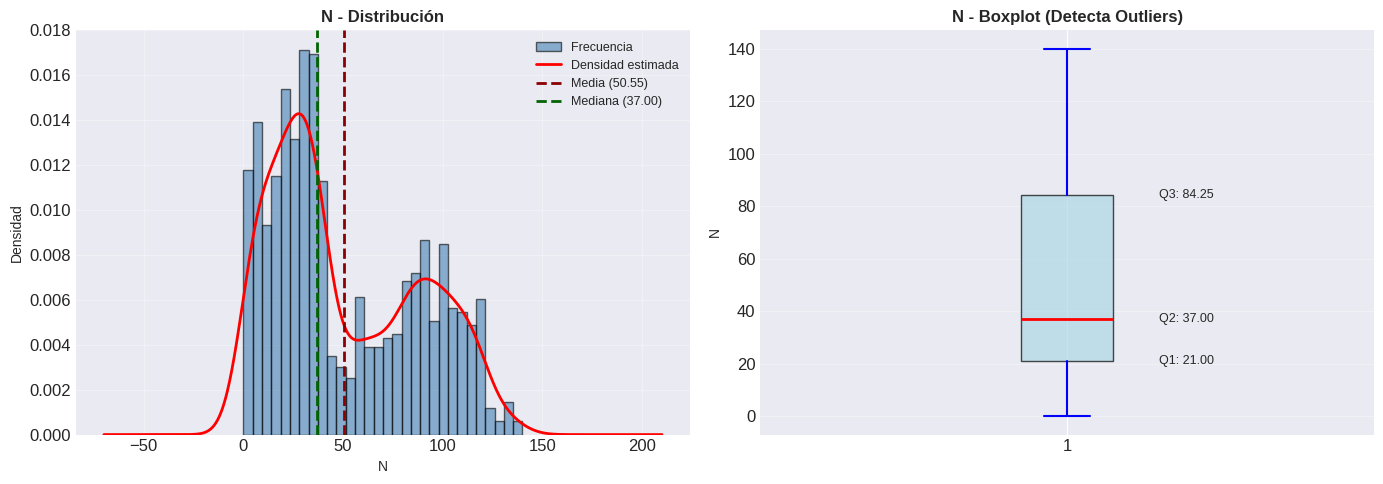




ANÁLISIS UNIVARIADO: P
1. Forma de la Distribución:


,Métrica,Valor,Interpretación
0,Asimetría (Skewness),1.011,Asimétrica positiva (cola derecha)
1,Curtosis,0.860,Picos altos (leptocúrtica)



2. Calidad de Datos:


,Aspecto,Resultado,Interpretación
0,Outliers,138 (6.27%),Outliers detectados
1,Test de Normalidad,p-value = 0.0000,NO normal



3. Resumen Ejecutivo:


,Aspecto,Hallazgo,Implicación
0,Rango,5.00 - 145.00,Muy alta (CV=61.8%)
1,Centralidad,"μ=53.36, M=51.00",Distribución equilibrada
2,Dispersión,σ=32.99,Muy alta (CV=61.8%)
3,Forma,Skew=1.01,Mayoría valores bajos
4,Calidad,138 outliers,Revisar outliers
5,Normalidad,NO normal,Escalado necesario



5. Interpretación por Cuartiles:


,Nivel,Descripción
0,Bajo (0-25%),0-28 kg/ha
1,Medio-Bajo (25-50%),28-51 kg/ha
2,Medio-Alto (50-75%),51-68 kg/ha
3,Alto (75-100%),> 68 kg/ha


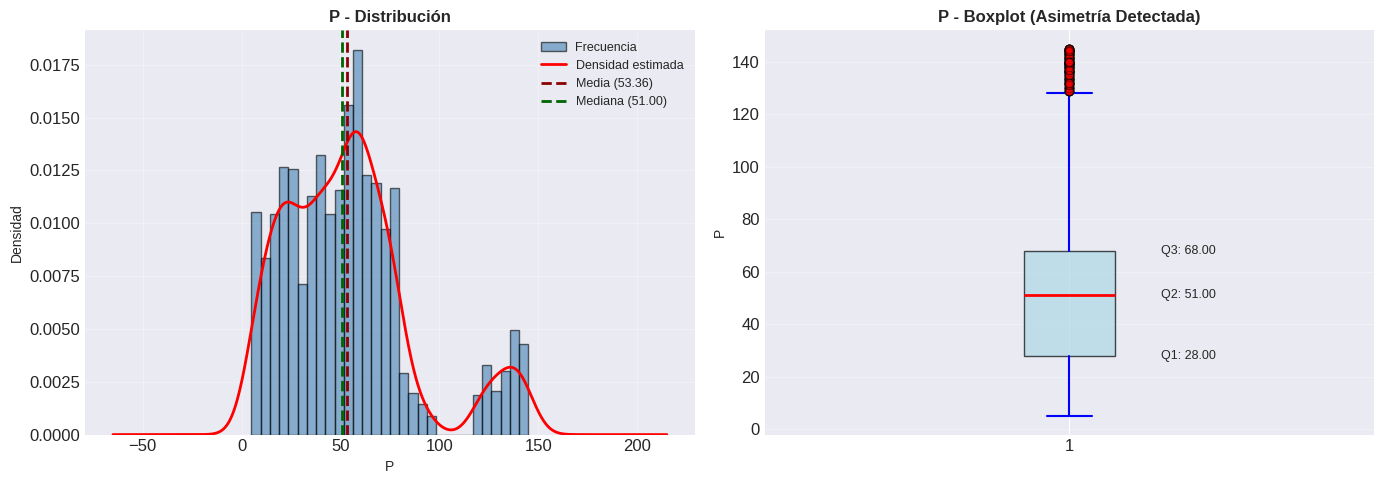




ANÁLISIS UNIVARIADO: K
1. Forma de la Distribución:


,Métrica,Valor,Interpretación
0,Asimetría (Skewness),2.375,Asimétrica positiva (cola derecha)
1,Curtosis,4.449,Picos altos (leptocúrtica)



2. Calidad de Datos:


,Aspecto,Resultado,Interpretación
0,Outliers,200 (9.09%),Outliers detectados
1,Test de Normalidad,p-value = 0.0000,NO normal



3. Resumen Ejecutivo:


,Aspecto,Hallazgo,Implicación
0,Rango,5.00 - 205.00,Muy alta (CV=105.2%)
1,Centralidad,"μ=48.15, M=32.00",Valores altos presentes
2,Dispersión,σ=50.65,Muy alta (CV=105.2%)
3,Forma,Skew=2.38,Mayoría valores bajos
4,Calidad,200 outliers,Revisar outliers
5,Normalidad,NO normal,Escalado necesario



5. Interpretación por Cuartiles:


,Nivel,Descripción
0,Bajo (0-25%),0-20 kg/ha
1,Medio-Bajo (25-50%),20-32 kg/ha
2,Medio-Alto (50-75%),32-49 kg/ha
3,Alto (75-100%),> 49 kg/ha


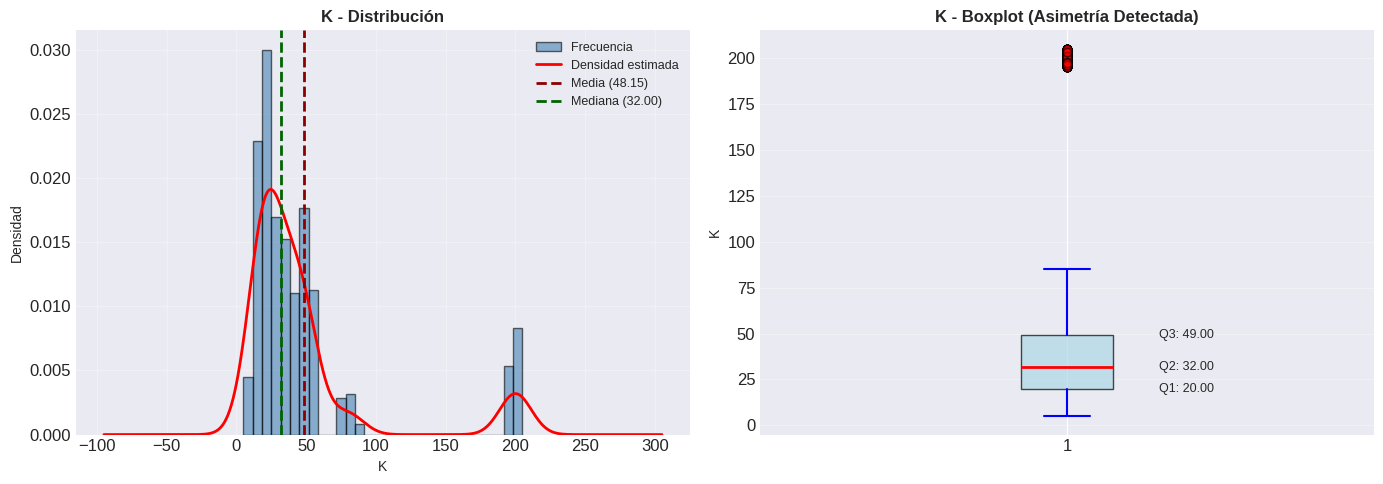




ANÁLISIS UNIVARIADO: temperature
1. Forma de la Distribución:


,Métrica,Valor,Interpretación
0,Asimetría (Skewness),0.185,Simétrica
1,Curtosis,1.233,Picos altos (leptocúrtica)



2. Calidad de Datos:


,Aspecto,Resultado,Interpretación
0,Outliers,86 (3.91%),Outliers detectados
1,Test de Normalidad,p-value = 0.0000,NO normal



3. Resumen Ejecutivo:


,Aspecto,Hallazgo,Implicación
0,Rango,8.83 - 43.68,Moderada (CV=19.8%)
1,Centralidad,"μ=25.62, M=25.60",Distribución equilibrada
2,Dispersión,σ=5.06,Moderada (CV=19.8%)
3,Forma,Skew=0.18,Distribución simétrica
4,Calidad,86 outliers,Revisar outliers
5,Normalidad,NO normal,Escalado necesario



5. Interpretación por Cuartiles:


,Nivel,Descripción
0,Bajo (0-25%),0.0-22.8 °C (clima frío)
1,Medio-Bajo (25-50%),22.8-25.6 °C (clima templado moderado)
2,Medio-Alto (50-75%),25.6-28.6 °C (clima cálido)
3,Alto (75-100%),> 28.6 °C (clima tropical/subtropical)


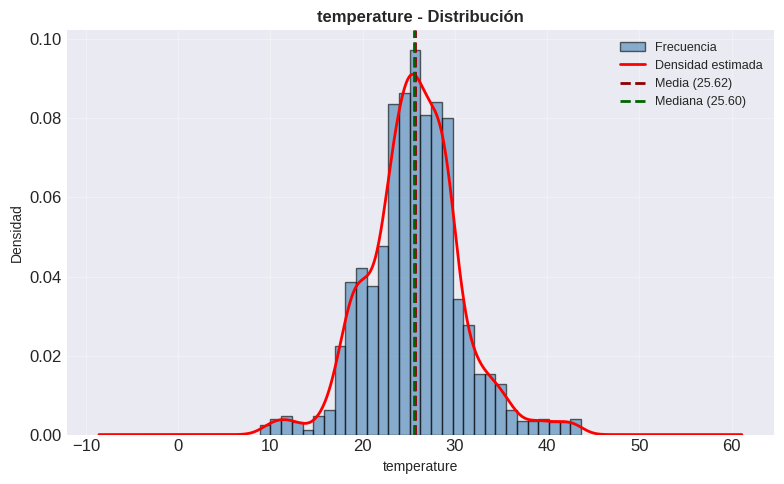




ANÁLISIS UNIVARIADO: humidity
1. Forma de la Distribución:


,Métrica,Valor,Interpretación
0,Asimetría (Skewness),-1.092,Asimétrica negativa (cola izquierda)
1,Curtosis,0.302,Normal (mesocúrtica)



2. Calidad de Datos:


,Aspecto,Resultado,Interpretación
0,Outliers,30 (1.36%),Outliers detectados
1,Test de Normalidad,p-value = 0.0000,NO normal



3. Resumen Ejecutivo:


,Aspecto,Hallazgo,Implicación
0,Rango,14.26 - 99.98,Alta (CV=31.1%)
1,Centralidad,"μ=71.48, M=80.47",Valores bajos dominan
2,Dispersión,σ=22.26,Alta (CV=31.1%)
3,Forma,Skew=-1.09,Mayoría valores altos
4,Calidad,30 outliers,Revisar outliers
5,Normalidad,NO normal,Escalado necesario



5. Interpretación por Cuartiles:


,Nivel,Descripción
0,Bajo (0-25%),0-60 % (condiciones de baja humedad)
1,Medio-Bajo (25-50%),60-80 % (humedad moderadamente baja)
2,Medio-Alto (50-75%),80-89 % (humedad moderadamente alta)
3,Alto (75-100%),> 89 % (condiciones de alta humedad)


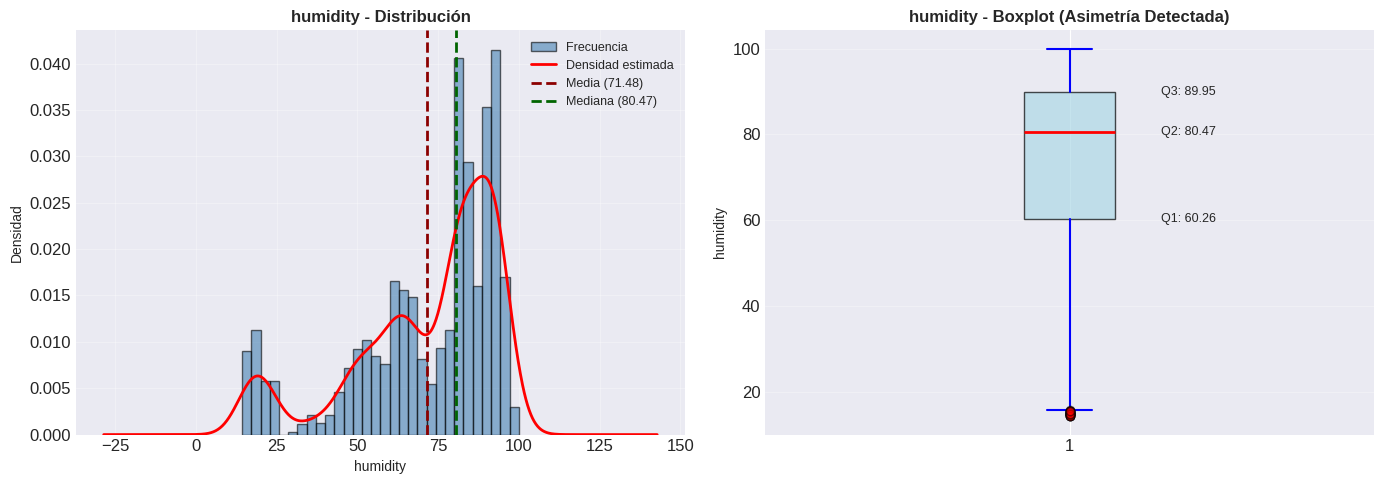




ANÁLISIS UNIVARIADO: ph
1. Forma de la Distribución:


,Métrica,Valor,Interpretación
0,Asimetría (Skewness),0.284,Simétrica
1,Curtosis,1.656,Picos altos (leptocúrtica)



2. Calidad de Datos:


,Aspecto,Resultado,Interpretación
0,Outliers,57 (2.59%),Outliers detectados
1,Test de Normalidad,p-value = 0.0000,NO normal



3. Resumen Ejecutivo:


,Aspecto,Hallazgo,Implicación
0,Rango,3.50 - 9.94,Baja (CV=12.0%)
1,Centralidad,"μ=6.47, M=6.43",Distribución equilibrada
2,Dispersión,σ=0.77,Baja (CV=12.0%)
3,Forma,Skew=0.28,Distribución simétrica
4,Calidad,57 outliers,Revisar outliers
5,Normalidad,NO normal,Escalado necesario



5. Interpretación por Cuartiles:


,Nivel,Descripción
0,Bajo (0-25%),0.0-6.0 (suelos ácidos)
1,Medio-Bajo (25-50%),6.0-6.4 (suelos ligeramente ácidos)
2,Medio-Alto (50-75%),6.4-6.9 (suelos neutros a ligeramente alcalinos)
3,Alto (75-100%),> 6.9 (suelos alcalinos)


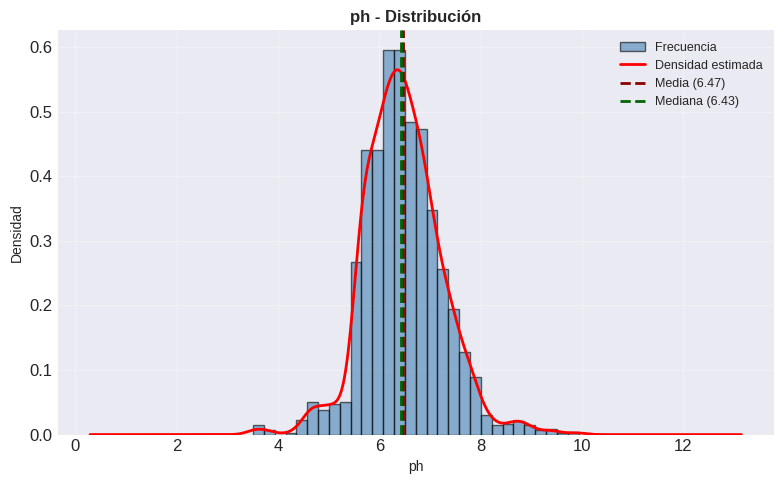




ANÁLISIS UNIVARIADO: rainfall
1. Forma de la Distribución:


,Métrica,Valor,Interpretación
0,Asimetría (Skewness),0.966,Asimétrica positiva (cola derecha)
1,Curtosis,0.607,Picos altos (leptocúrtica)



2. Calidad de Datos:


,Aspecto,Resultado,Interpretación
0,Outliers,100 (4.55%),Outliers detectados
1,Test de Normalidad,p-value = 0.0000,NO normal



3. Resumen Ejecutivo:


,Aspecto,Hallazgo,Implicación
0,Rango,20.21 - 298.56,Muy alta (CV=53.1%)
1,Centralidad,"μ=103.46, M=94.87",Distribución equilibrada
2,Dispersión,σ=54.96,Muy alta (CV=53.1%)
3,Forma,Skew=0.97,Mayoría valores bajos
4,Calidad,100 outliers,Revisar outliers
5,Normalidad,NO normal,Escalado necesario



5. Interpretación por Cuartiles:


,Nivel,Descripción
0,Bajo (0-25%),0-64 mm (zona con baja precipitación anual)
1,Medio-Bajo (25-50%),64-94 mm (precipitación moderadamente baja)
2,Medio-Alto (50-75%),94-124 mm (precipitación moderadamente alta)
3,Alto (75-100%),> 124 mm (zona con alta precipitación anual)


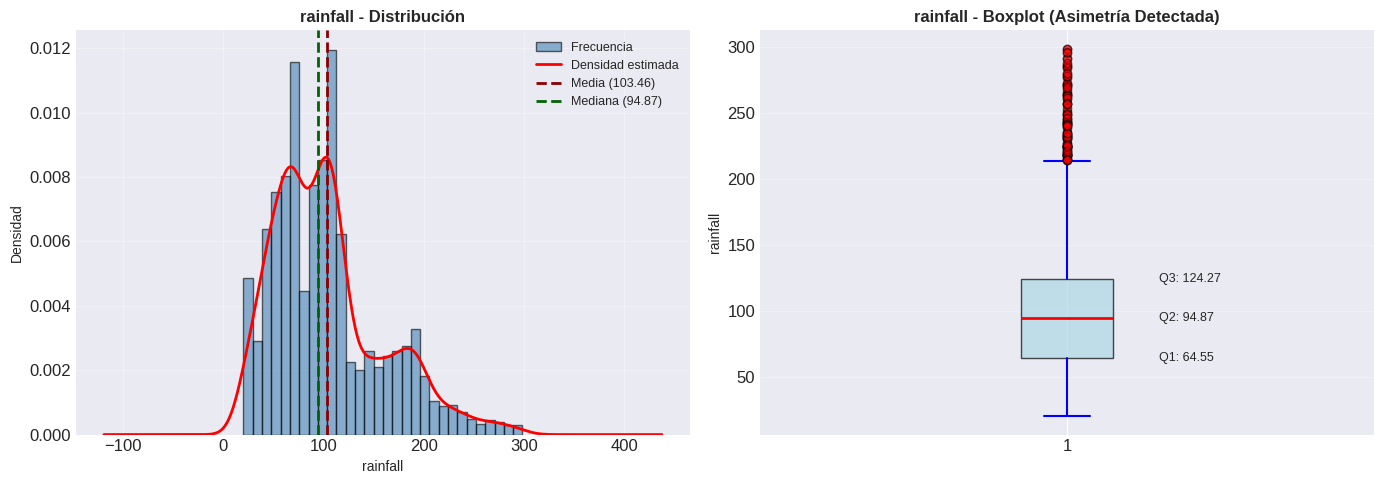




📊 TABLA COMPARATIVA: TODAS LAS VARIABLES NUMÉRICAS



,variable,mean,median,std,skewness,kurtosis,outliers,normal,p_value
0,N,50.55,37.00,36.92,0.51,-1.06,0,False,0.00
1,P,53.36,51.00,32.99,1.01,0.86,138,False,0.00
2,K,48.15,32.00,50.65,2.38,4.45,200,False,0.00
3,temperature,25.62,25.60,5.06,0.18,1.23,86,False,0.00
4,humidity,71.48,80.47,22.26,-1.09,0.30,30,False,0.00
5,ph,6.47,6.43,0.77,0.28,1.66,57,False,0.00
6,rainfall,103.46,94.87,54.96,0.97,0.61,100,False,0.00



CONCLUSIONES GENERALES:
✓ Variables analizadas: 7
✓ Variables normales: 0 de 7
✓ Variables con outliers: 6 de 7



In [12]:
# Función para análisis univariado robusto

# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline

import importlib
import univariate_analysis
importlib.reload(univariate_analysis)

from univariate_analysis import analyze_numeric_values

# Variables numéricas
num_vars = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
#  num_vars = ['temperature']

# Estadísticas descriptivas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS".center(80))
print("=" * 80)
display(crop_data[num_vars].describe().round(2).T)

# Analizar variables numéricas clave
analyze_numeric_values(crop_data, num_vars)



#### Análisis de Entendimiento de Datos Univariado

Al ejecutar script de análisis univariado podemos observar que el dataset de recomendación de cultivos contiene **2,200 muestras** con **7 variables numéricas** que describen características del suelo y condiciones agroclimáticas. Todas las variables presentan **distribuciones NO normales** (p-value < 0.05), lo que indica la necesidad de técnicas robustas de preprocesamiento y modelado.

---

#### 1. Análisis por Variable

| Variable | Rango | Media | Mediana | Desv. Est. | CV | Asimetría | Curtosis | Outliers (%) | Características Clave |
|----------|-------|-------|---------|------------|-----|-----------|----------|--------------|----------------------|
| **Nitrógeno (N)** | 0-140 kg/ha | 50.55 | 37.00 | 36.92 | 73% | 0.51 | -1.06 | 0 (0%) | Alta variabilidad; asimetría positiva moderada; distribución aplastada; sin outliers |
| **Fósforo (P)** | 0-145 kg/ha | 53.36 | 51.00 | 32.99 | 62% | 1.01 | 0.86 | 138 (6.3%) | Asimetría positiva fuerte; cola derecha pronunciada; presencia significativa de outliers |
| **Potasio (K)** | 0-205 kg/ha | 48.15 | 32.00 | 50.65 | 105% | 2.38 | 4.45 | 200 (9.1%) | **Variable más problemática**; dispersión extrema; probable distribución bimodal; mayor proporción de outliers |
| **Temperatura** | 8.8-43.7°C | 25.62 | 25.60 | 5.06 | 20% | 0.18 | 1.23 | 86 (3.9%) | **Variable más balanceada**; casi simétrica; menor variabilidad relativa; bien comportada |
| **Humedad** | 14-100% | 71.48 | 80.47 | 22.26 | 31% | -1.09 | 0.30 | 30 (1.4%) | **Única con asimetría negativa**; mayoría de valores altos (70-100%); cola izquierda |
| **pH** | 3.5-9.9 | 6.47 | 6.43 | 0.77 | 12% | 0.28 | 1.66 | 57 (2.6%) | **Variable más concentrada**; menor CV; distribución equilibrada; valores concentrados en pH neutro |
| **Precipitación** | 20-298 mm | 103.46 | 94.87 | 54.96 | 53% | 0.97 | 0.61 | 100 (4.5%) | Alta variabilidad; asimetría positiva; discriminante para cultivos secano vs. trópico húmedo |

### 2. Hallazgos Transversales

#### 2.1 Normalidad
- **0 de 7 variables** siguen distribución normal (todas p-value < 0.05)
- **Implicación**: Modelos paramétricos tradicionales (LDA, Naive Bayes Gaussiano) pueden no ser óptimos
- **Recomendación**: Usar modelos tree-based (Random Forest, XGBoost) que no asumen normalidad

#### 2.2 Outliers
- Por el método de IQR, se evidencia que **6 de 7 variables** tienen outliers

#### 2. Variable Categórica (Objetivo)
- Análisis de 'label' (22 cultivos)
- Frecuencias y proporciones
- Balance de clases
- Gráficos de barras y pastel

### Análisis de Variable Categórica


ANÁLISIS UNIVARIABLE: label (Variable Objetivo)

1. Tabla de Frecuencias:
             Frecuencia Absoluta  Frecuencia Relativa  Porcentaje
label                                                            
rice                         100                 0.05        4.55
maize                        100                 0.05        4.55
chickpea                     100                 0.05        4.55
kidneybeans                  100                 0.05        4.55
pigeonpeas                   100                 0.05        4.55
mothbeans                    100                 0.05        4.55
mungbean                     100                 0.05        4.55
blackgram                    100                 0.05        4.55
lentil                       100                 0.05        4.55
pomegranate                  100                 0.05        4.55
banana                       100                 0.05        4.55
mango                        100                 0.05        4.55
g

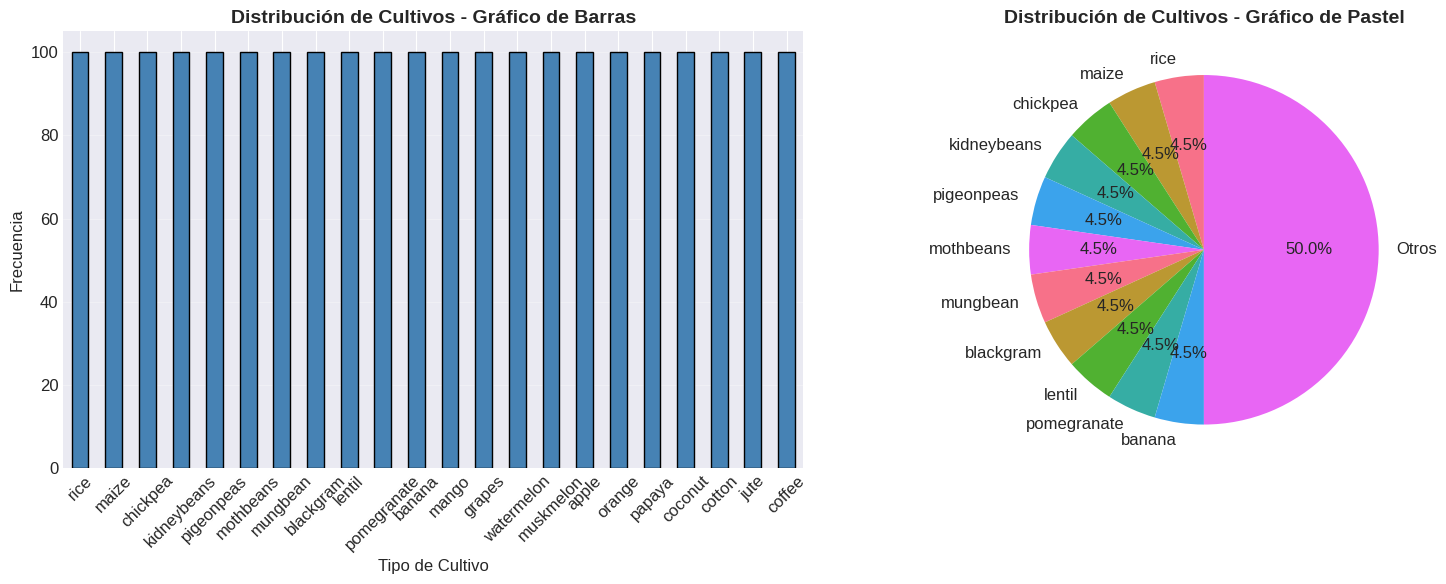

In [13]:
# Análisis de la variable categórica 'label' (cultivo recomendado)

# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline
import importlib
import analyze_categorical
importlib.reload(analyze_categorical)

from analyze_categorical import analyze_categorical

analyze_categorical(crop_data, 'label')

Nota: La **entropía** en el análisis de variables categóricas es una medida de incertidumbre o desorden en la distribución de las categorías. 

¿Qué significa en este contexto?
Si todas las clases tienen frecuencias similares, la entropía será alta (máxima diversidad, distribución uniforme).
Si una clase domina (por ejemplo, 90% de los datos), la entropía será baja (baja diversidad, alta concentración).

#### Matriz de correlación: Relaciones entre variables

**Correlación de Pearson**:
- Mide relación **lineal** entre variables
- Rango: [-1, +1]
- 0 = Sin relación lineal (¡pero puede haber no-lineal!)

**Interpretación**:
- |r| < 0.1: Muy débil
- 0.1 ≤ |r| < 0.3: Débil
- 0.3 ≤ |r| < 0.5: Moderada
- 0.5 ≤ |r| < 0.7: Fuerte
- |r| ≥ 0.7: Muy fuerte

**Cuidado**: Correlación ≠ Causalidad

📊 Análisis de correlación (heatmaps + barras) guardado en: plots/correlation_analysis_multimetric.png


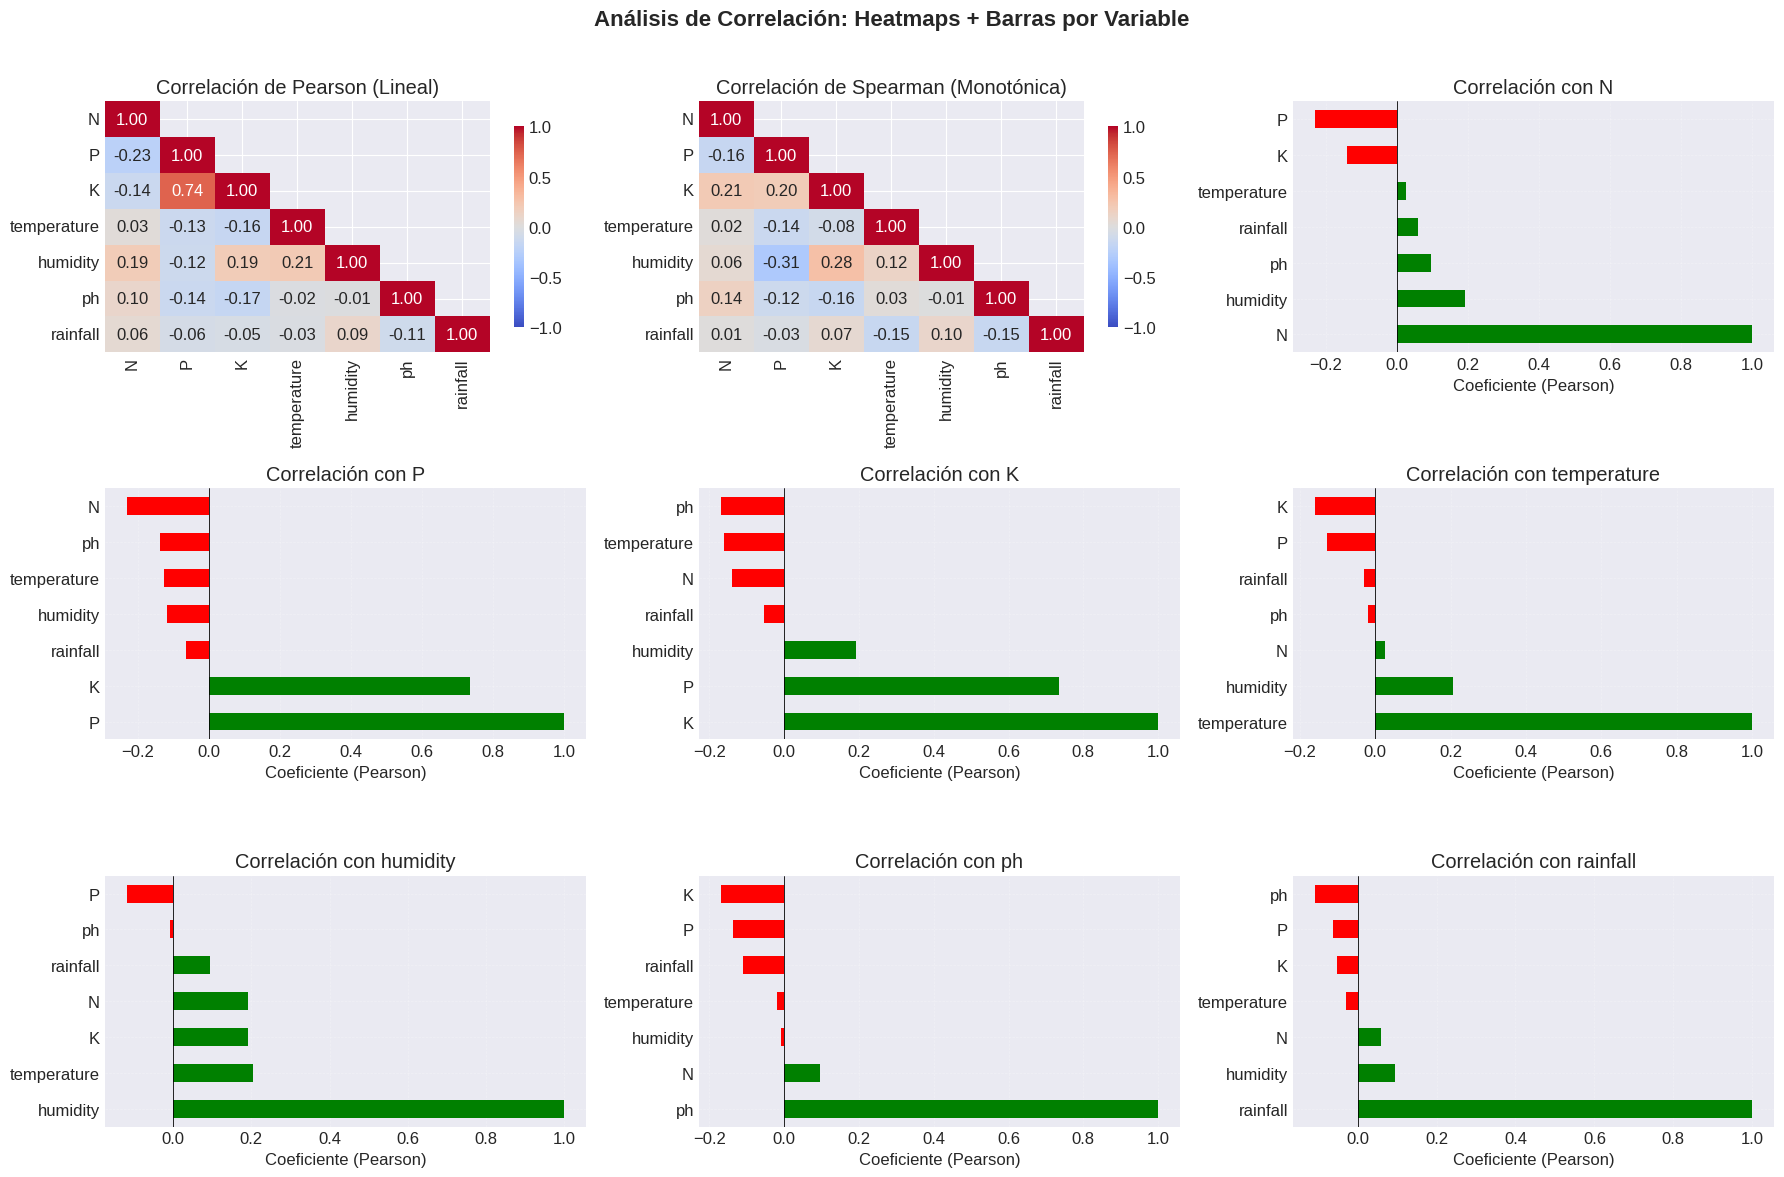


🔗 Todas las correlaciones (Pearson) entre pares de variables:
Variable A      Variable B             r  Fuerza  Dirección
----------------------------------------------------------------------
N               P                 -0.231  Débil      Negativa
N               K                 -0.141  Débil      Negativa
N               temperature       +0.027  Muy Débil  Positiva
N               humidity          +0.191  Débil      Positiva
N               ph                +0.097  Muy Débil  Positiva
N               rainfall          +0.059  Muy Débil  Positiva
P               K                 +0.736  Muy Fuerte Positiva
P               temperature       -0.128  Débil      Negativa
P               humidity          -0.119  Débil      Negativa
P               ph                -0.138  Débil      Negativa
P               rainfall          -0.064  Muy Débil  Negativa
K               temperature       -0.160  Débil      Negativa
K               humidity          +0.191  Débil      Positiva


In [14]:
# Análisis de correlación mejorado
from correlation_analysis import correlation_analysis

correlation_analysis(crop_data)

### Interpretación de las Correlaciones

**Relación destacada y única:**
- P – K = **+0.736** → correlación muy fuerte y positiva. Sugiere posible multicolinealidad (nutrientes del suelo afectados por prácticas de fertilización similares o composición edáfica compartida).

**Relación secundaria (N – K):**
- Nitrogeno – Potasio muestra la segunda correlación más alta del conjunto pero permanece dentro del rango débil (|r| ≤ 0.231). Esto indica que NO hay una dependencia lineal fuerte entre ambos; podría reflejar prácticas de abonado combinadas o un gradiente edáfico suave, pero no alcanza niveles de preocupación por multicolinealidad. No requiere acciones de reducción (p.ej. eliminación, PCA) y en modelos lineales bastaría con regularización estándar.

**Resto de correlaciones:**
- Todas las demás están en rangos débiles o muy débiles (|r| ≤ 0.231) → baja redundancia lineal entre la mayoría de variables numéricas.

**Clima entre sí:**
- temperature – humidity = **+0.205** (débil). Plausible por co‐variación estacional / regional (más calor asociado a cierta retención de humedad en algunas zonas), pero no es determinante.

**Patrones suaves adicionales:**
- ph – rainfall = **−0.109**: ligera tendencia a menor pH (más ácido) con más lluvia; magnitud pequeña que sugiere efectos de lixiviación/acidificación leves.

**Conclusión práctica:**
- Salvo el binomio P–K, no existen dependencias lineales fuertes. Para un sistema de recomendación de cultivo (variable objetivo categórica) la señal predictiva probablemente provendrá de:
  1. Interacciones no lineales entre nutrientes y clima.
  2. Patrones multivariados más sutiles (combinaciones de N, P, K con pH y humedad).
  3. Posible importancia de variables individuales sin redundancia (baja colinealidad = modelo más estable).

**Implicación para modelado:**
- Modelos lineales podrían incluir regularización para manejar la multicolinealidad P–K.
- Árboles / ensembles (Random Forest, Gradient Boosting) capturarán interacciones sin requerir ingeniería pesada.
- Considerar verificar VIF solo para nutrientes si se usa un modelo lineal.

> En resumen: estructura de correlación limpia y parsimoniosa; no se requiere fuerte reducción por colinealidad, excepto vigilar el par P–K y monitorizar N–K si se añadieran nuevas fuentes de datos o más variables de suelo.

### Detección de Anomalías y Outliers

**Outliers:** ¿Errores o información valiosa?

**Tipos de outliers**:
1. **Errores**:
2. **Casos raros pero válidos**: 
3. **Diferentes poblaciones**:

**Métodos de detección**:
- **IQR**: Fuera de Q1-1.5×IQR o Q3+1.5×IQR
- **Z-score**: |z| > 3
- **Isolation Forest**: Algoritmo de ML para anomalías

#### Distribuciones problemáticas

**Alta asimetría (skewness)**:
- Problema: Muchos algoritmos asumen normalidad
- Solución: Transformación log, sqrt o Box-Cox

**Alta curtosis**:
- Problema: Colas pesadas, muchos outliers
- Solución: Winsorization (cap de valores extremos)

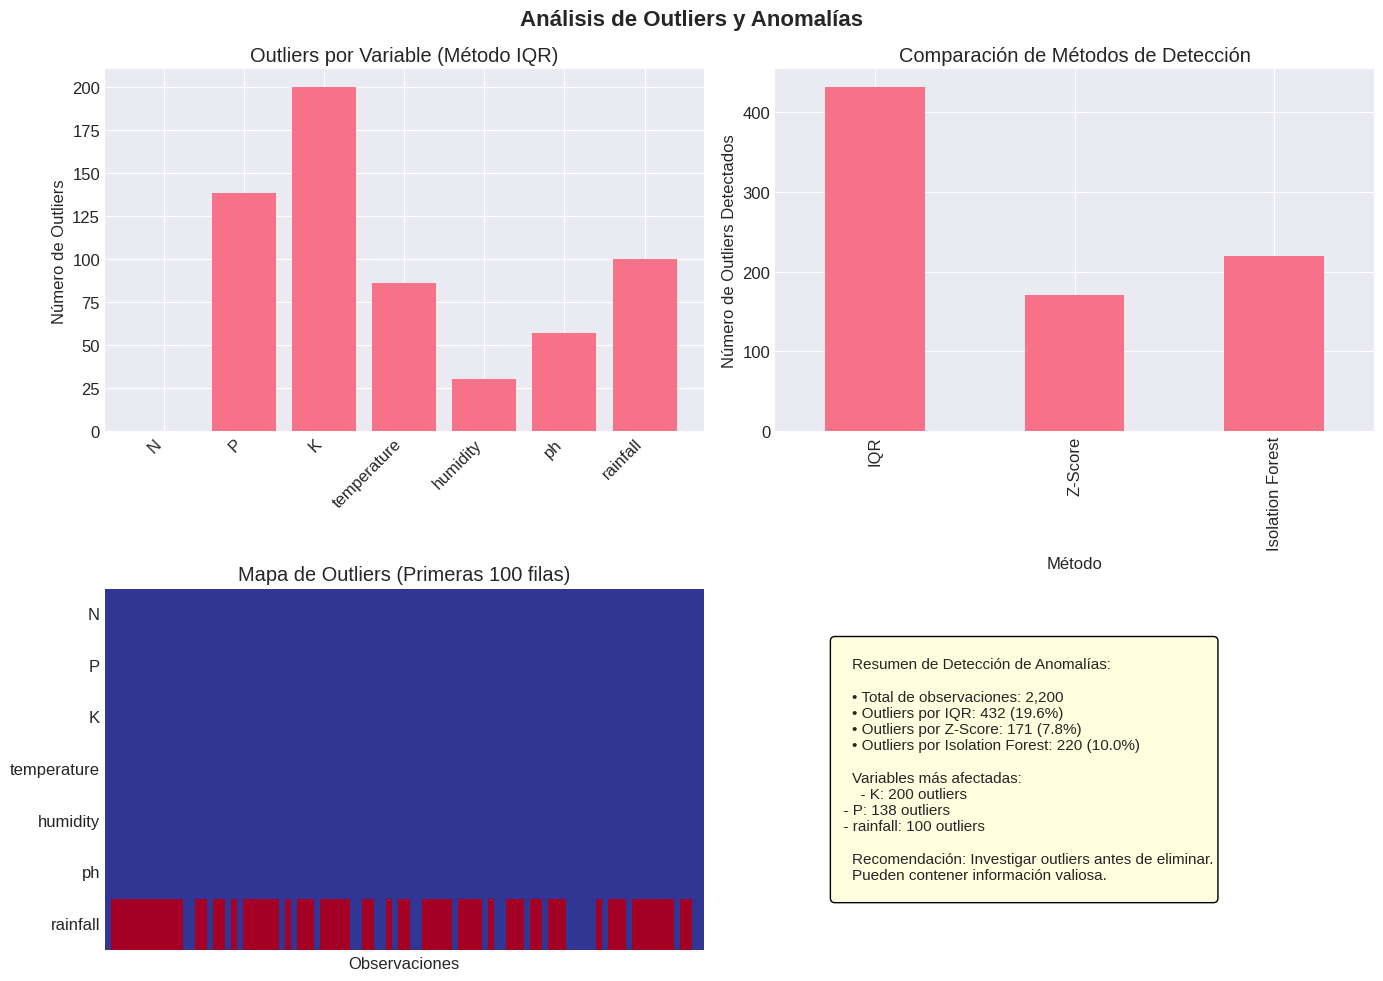

In [15]:
# Detección de outliers

# Configuración para mostrar gráficos en Jupyter Notebook
%matplotlib inline

import importlib
import detect_outliers
importlib.reload(detect_outliers)

from detect_outliers import detect_outliers

outliers_iqr, outliers_zscore, outliers_iso = detect_outliers(crop_data, False)

## 4. Fase 3: Preparación de los Datos

---

## 🎓 Material Adicional y Referencias

### Referencias Bibliográficas

In [16]:
references = """
📚 REFERENCIAS:

[1] FAO (2017). The impact of crop choice on farm profitability. Food and Agriculture Organization. http://www.fao.org/3/i7658e/i7658e.pdf
[2] Bhola, A., & Kumar, P. (2024). Farm-Level Smart Crop Recommendation Framework Using Machine Learning. Annals of Data Science. https://link.springer.com/article/10.1007/s40745-024-00534-3
[3] Bakr, M. A., et al. (2025). Evaluation of Learning-Based Models for Crop Recommendation in Smart Agriculture. Information, MDPI. https://www.mdpi.com/2078-2489/16/8/632
[4] Van Klompenburg, T., Kassahun, A., & Catal, C. (2020). Crop yield prediction using machine learning: A systematic literature review. Computers and Electronics in Agriculture. https://doi.org/10.1016/j.compag.2020.105709
[5] Lal, R. (2015). Restoring Soil Quality to Mitigate Soil Degradation. Sustainability. https://doi.org/10.3390/su7055875
[6] Reddy, D. J., et al. (2024). Advancing crop recommendation system with supervised machine learning and explainable artificial intelligence. Scientific Reports. https://doi.org/10.1038/s41598-024-07003-8
"""

print(references)


📚 REFERENCIAS:

[1] FAO (2017). The impact of crop choice on farm profitability. Food and Agriculture Organization. http://www.fao.org/3/i7658e/i7658e.pdf
[2] Bhola, A., & Kumar, P. (2024). Farm-Level Smart Crop Recommendation Framework Using Machine Learning. Annals of Data Science. https://link.springer.com/article/10.1007/s40745-024-00534-3
[3] Bakr, M. A., et al. (2025). Evaluation of Learning-Based Models for Crop Recommendation in Smart Agriculture. Information, MDPI. https://www.mdpi.com/2078-2489/16/8/632
[4] Van Klompenburg, T., Kassahun, A., & Catal, C. (2020). Crop yield prediction using machine learning: A systematic literature review. Computers and Electronics in Agriculture. https://doi.org/10.1016/j.compag.2020.105709
[5] Lal, R. (2015). Restoring Soil Quality to Mitigate Soil Degradation. Sustainability. https://doi.org/10.3390/su7055875
[6] Reddy, D. J., et al. (2024). Advancing crop recommendation system with supervised machine learning and explainable artificial int